In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import GridSearchCV, KFold,train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import preprocessing

In [3]:
Forestfires = pd.read_csv("/content/forestfires.csv")
Forestfires

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


In [5]:
Forestfires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [6]:
# From the above we can see that there are no Null Values in the data

In [9]:
Duplicate = Forestfires.duplicated()
print('Duplicate Rows: %d' %Duplicate.sum())

Duplicate Rows: 8


In [10]:
# There are total 8 Duplicate Rows in the data

In [11]:
print('Rows before Removal of duplicates = %d' % Forestfires.shape[0])

Forestfires = Forestfires.drop_duplicates()
print('Rows after Removal of duplicates = %d' % Forestfires.shape[0])

Rows before Removal of duplicates = 517
Rows after Removal of duplicates = 509


In [13]:
# As month & day variables have dummy columns we'll have to drop it out
Forestfires = Forestfires.drop(['month','day'],axis=1)
Forestfires.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small


In [14]:
Forestfires.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,90.618075,110.235756,547.787623,9.023576,18.865422,44.253438,4.011395,0.020432,12.992908,0.163065,0.145383,0.161100,0.184676,0.117878,0.123772,0.104126,0.017682,0.349705,0.017682,0.039293,0.003929,0.062868,0.031434,0.104126,0.003929,0.001965,0.029470,0.337917
std,5.555527,63.804112,248.196222,4.585083,5.841083,16.365192,1.800926,0.296261,64.133357,0.369788,0.352833,0.367985,0.388416,0.322781,0.329645,0.305724,0.131921,0.477346,0.131921,0.194482,0.062622,0.242965,0.174660,0.305724,0.062622,0.044324,0.169285,0.473466
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,62.300000,437.700000,6.400000,15.400000,32.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.610000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,141.300000,713.900000,11.000000,22.800000,53.000000,4.900000,0.000000,6.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## OBJECTIVE: PREDICT THE BURNED AREA OF FOREST FIRES

In [15]:
Forestfires['size_category'].value_counts()

small    371
large    138
Name: size_category, dtype: int64

In [17]:
Forestfires.loc[Forestfires["size_category"]=='small','size_category']=0
Forestfires.loc[Forestfires["size_category"]=='large','size_category']=1

In [18]:
Forestfires["size_category"].value_counts()

0    371
1    138
Name: size_category, dtype: int64

In [19]:
# Data Visualization using Box-Plot representation
# Box-Plot representation to detect outliers in the variables

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


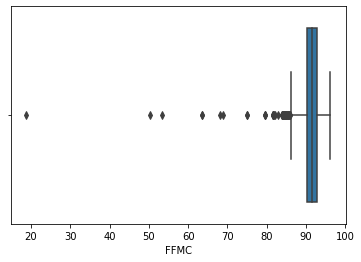

In [20]:
sns.boxplot(Forestfires['FFMC'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


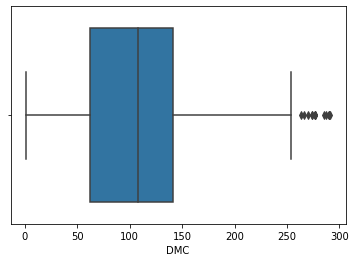

In [21]:
sns.boxplot(Forestfires['DMC'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


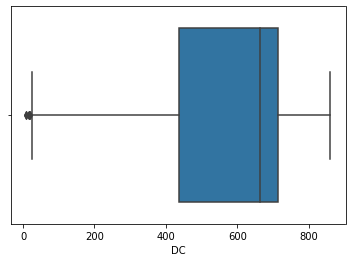

In [22]:
sns.boxplot(Forestfires['DC'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


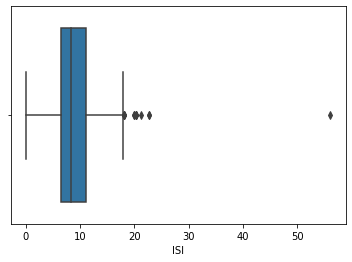

In [23]:
sns.boxplot(Forestfires['ISI'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


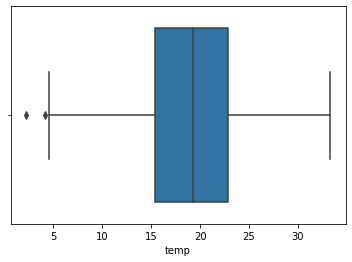

In [24]:
sns.boxplot(Forestfires['temp'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


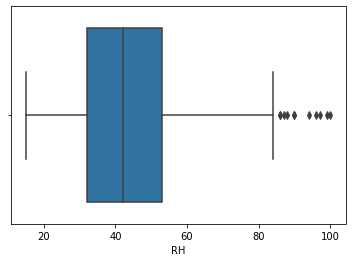

In [25]:
sns.boxplot(Forestfires['RH'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


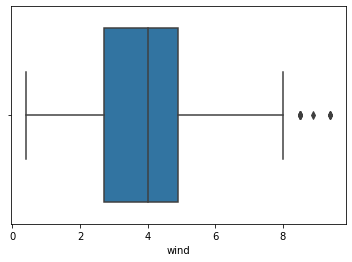

In [26]:
sns.boxplot(Forestfires['wind'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


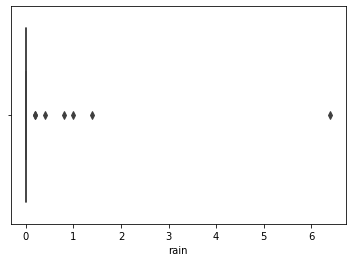

In [27]:
sns.boxplot(Forestfires['rain'])

In [28]:
# We observed that in each variables there are few outliers.

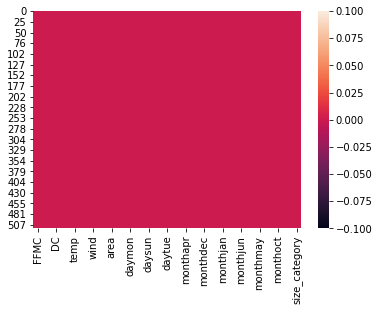

In [29]:
# We'll now use Heat-Map in order to check the missing values and correlation
#HEATMAP
sns.heatmap(Forestfires.isnull())

In [30]:
# The above heatmap shows that there are no missing values in the dataset.

In [31]:
Forestfires.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [33]:
X = Forestfires.drop(["size_category"], axis = 1)
Y = Forestfires['size_category']

## Train and Test

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .3, random_state = 30)

In [35]:
X_train

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
12,63.5,70.8,665.3,0.8,17.0,72,6.7,0.0,0.00,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
138,85.8,48.3,313.4,3.9,18.0,42,2.7,0.0,0.36,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
214,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,28.66,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
509,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,2.17,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
305,89.6,84.1,714.3,5.7,19.0,52,2.2,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
434,90.6,269.8,811.2,5.5,22.2,45,3.6,0.0,0.00,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
425,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,0.00,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [36]:
Y_train

513    1
12     0
138    0
214    1
509    0
      ..
507    0
305    0
434    0
425    0
296    0
Name: size_category, Length: 356, dtype: object

In [37]:
Y_train = np.array(Y_train)

In [38]:
X_test

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
355,92.1,99.0,745.3,9.6,20.8,35,4.9,0.0,13.06,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
360,92.5,122.0,789.7,10.2,18.4,42,2.2,0.0,1.09,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
314,92.6,115.4,777.1,8.8,19.7,41,1.8,0.0,1.58,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
363,91.9,111.7,770.3,6.5,15.9,53,2.2,0.0,2.93,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
135,93.5,139.4,594.2,20.3,17.6,52,5.8,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,88.6,69.7,706.8,5.8,20.6,37,1.8,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
245,91.8,175.1,700.7,13.8,26.8,38,6.3,0.0,0.76,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
194,94.8,108.3,647.1,17.0,24.6,22,4.5,0.0,10.01,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
185,91.0,129.5,692.6,7.0,17.6,46,3.1,0.0,7.04,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [39]:
Y_test

355    1
360    0
314    0
363    0
135    0
      ..
32     0
245    0
194    1
185    1
277    1
Name: size_category, Length: 153, dtype: object

In [40]:
Y_test = np.array(Y_test)

## NORMALIZATION

In [41]:
# We'll use min-max scalar
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing data
X_test_norm = norm.transform(X_test)

In [42]:
X_train_norm.shape

(356, 28)

In [43]:
X_test_norm.shape

(153, 28)

In [44]:
Y_train.shape

(356,)

In [45]:
Y_test.shape

(153,)

# Neural Networks

In [46]:
# We'll use Neural Networks for prediction
# We'll have to use Cross-Validation Analysis as NN requires Hyperparameters

In [47]:
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=28, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [63]:
model = KerasClassifier(build_fn = create_model,verbose = 0)

# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,200,400,450]

# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)

# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_train_norm,Y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


[CV] ............ batch_size=10, epochs=10, score=0.736, total=  16.6s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.7s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.676, total=   1.6s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   18.2s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.718, total=   1.8s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   20.0s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.746, total=   1.5s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   21.5s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.761, total=   1.5s
[CV] batch_size=10, epochs=200 .......................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   23.0s remaining:    0.0s


[CV] ........... batch_size=10, epochs=200, score=0.917, total=   6.8s
[CV] batch_size=10, epochs=200 .......................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   29.8s remaining:    0.0s


[CV] ........... batch_size=10, epochs=200, score=0.817, total=  11.4s
[CV] batch_size=10, epochs=200 .......................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   41.2s remaining:    0.0s


[CV] ........... batch_size=10, epochs=200, score=0.944, total=  11.4s
[CV] batch_size=10, epochs=200 .......................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   52.6s remaining:    0.0s


[CV] ........... batch_size=10, epochs=200, score=0.901, total=   7.1s
[CV] batch_size=10, epochs=200 .......................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   59.7s remaining:    0.0s


[CV] ........... batch_size=10, epochs=200, score=0.803, total=  11.4s
[CV] batch_size=10, epochs=400 .......................................
[CV] ........... batch_size=10, epochs=400, score=0.903, total=  13.7s
[CV] batch_size=10, epochs=400 .......................................
[CV] ........... batch_size=10, epochs=400, score=0.887, total=  21.7s
[CV] batch_size=10, epochs=400 .......................................
[CV] ........... batch_size=10, epochs=400, score=0.915, total=  22.2s
[CV] batch_size=10, epochs=400 .......................................
[CV] ........... batch_size=10, epochs=400, score=0.901, total=  12.9s
[CV] batch_size=10, epochs=400 .......................................
[CV] ........... batch_size=10, epochs=400, score=0.859, total=  12.5s
[CV] batch_size=10, epochs=450 .......................................
[CV] ........... batch_size=10, epochs=450, score=0.931, total=  14.3s
[CV] batch_size=10, epochs=450 .......................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  7.3min finished


In [64]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9185054779052735, using {'batch_size': 10, 'epochs': 450}
0.7275039076805114,0.02918371000086898 with: {'batch_size': 10, 'epochs': 10}
0.8762910842895508,0.05608118607965705 with: {'batch_size': 10, 'epochs': 200}
0.8932316064834595,0.01923370829680992 with: {'batch_size': 10, 'epochs': 400}
0.9185054779052735,0.03613709867636422 with: {'batch_size': 10, 'epochs': 450}
0.7078638434410095,0.018633528744074267 with: {'batch_size': 20, 'epochs': 10}
0.8312988996505737,0.057349636017903056 with: {'batch_size': 20, 'epochs': 200}
0.8791862368583679,0.02909956645855191 with: {'batch_size': 20, 'epochs': 400}
0.8736306667327881,0.047861503942329235 with: {'batch_size': 20, 'epochs': 450}
0.7220266103744507,0.03139118903725144 with: {'batch_size': 40, 'epochs': 10}
0.8483567953109741,0.03904341227826314 with: {'batch_size': 40, 'epochs': 200}
0.8680751085281372,0.03233648215904495 with: {'batch_size': 40, 'epochs': 400}
0.856729257106781,0.016510718131869204 with: {'batch_size': 40, 

In [65]:
# Learning rate and Drop-out Rate
from keras.layers import Dropout

# Defining the model

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(8,input_dim = 28,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4,input_dim = 28,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 450)

# Define the grid search parameters

learning_rate = [0.0001,0.001,0.01,0.1]
dropout_rate = [0.0,0.05,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_train_norm,Y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] dropout_rate=0.0, learning_rate=0.0001 ..........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


[CV]  dropout_rate=0.0, learning_rate=0.0001, score=0.708, total=   8.8s
[CV] dropout_rate=0.0, learning_rate=0.0001 ..........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.8s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.0001, score=0.704, total=   8.5s
[CV] dropout_rate=0.0, learning_rate=0.0001 ..........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   17.3s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.0001, score=0.718, total=  11.5s
[CV] dropout_rate=0.0, learning_rate=0.0001 ..........................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   28.7s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.0001, score=0.775, total=  11.5s
[CV] dropout_rate=0.0, learning_rate=0.0001 ..........................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   40.2s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.0001, score=0.817, total=  12.0s
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   52.2s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.001, score=0.889, total=   8.4s
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.0min remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.001, score=0.901, total=  11.6s
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.2min remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.001, score=0.958, total=   8.5s
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.3min remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.001, score=0.859, total=  11.5s
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.5min remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.001, score=0.831, total=  11.5s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................
[CV]  dropout_rate=0.0, learning_rate=0.01, score=0.944, total=  11.5s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................
[CV]  dropout_rate=0.0, learning_rate=0.01, score=0.887, total=   8.0s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................
[CV]  dropout_rate=0.0, learning_rate=0.01, score=0.930, total=   8.0s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................
[CV]  dropout_rate=0.0, learning_rate=0.01, score=0.944, total=  11.5s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................
[CV]  dropout_rate=0.0, learning_rate=0.01, score=0.845, total=  11.5s
[CV] dropout_rate=0.0, learning_rate=0.1 .............................
[CV] . dropout_rate=0.0, learning_rate=0.1, score=0.681, total=  11.9s
[CV] dropout_rate=0.0, learning_rate=0.1 .............................
[CV] 

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 13.2min finished


In [66]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9101330280303955, using {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.7444835662841797,0.044196952003436034 with: {'dropout_rate': 0.0, 'learning_rate': 0.0001}
0.887636935710907,0.04272502053433631 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.9100156426429749,0.038556136676563886 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.783998453617096,0.09049798736362137 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.7416666746139526,0.039713017715482996 with: {'dropout_rate': 0.05, 'learning_rate': 0.0001}
0.8960876345634461,0.039374479333590125 with: {'dropout_rate': 0.05, 'learning_rate': 0.001}
0.9043818473815918,0.03513431884069493 with: {'dropout_rate': 0.05, 'learning_rate': 0.01}
0.7417449235916138,0.05430950599475284 with: {'dropout_rate': 0.05, 'learning_rate': 0.1}
0.7417449116706848,0.04892930744451635 with: {'dropout_rate': 0.1, 'learning_rate': 0.0001}
0.8622848153114319,0.04927962093901812 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.9101330

In [67]:
# Defining the model

def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(8,input_dim = 28,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.05))
    model.add(Dense(4,input_dim = 28,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.05))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.01)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 450)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_train_norm,Y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] activation_function=softmax, init=uniform .......................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


[CV]  activation_function=softmax, init=uniform, score=0.889, total=   8.6s
[CV] activation_function=softmax, init=uniform .......................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.6s remaining:    0.0s


[CV]  activation_function=softmax, init=uniform, score=0.831, total=   8.6s
[CV] activation_function=softmax, init=uniform .......................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   17.2s remaining:    0.0s


[CV]  activation_function=softmax, init=uniform, score=0.986, total=   9.2s
[CV] activation_function=softmax, init=uniform .......................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   26.4s remaining:    0.0s


[CV]  activation_function=softmax, init=uniform, score=0.944, total=  11.5s
[CV] activation_function=softmax, init=uniform .......................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   37.9s remaining:    0.0s


[CV]  activation_function=softmax, init=uniform, score=0.831, total=  11.6s
[CV] activation_function=softmax, init=normal ........................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   49.5s remaining:    0.0s


[CV]  activation_function=softmax, init=normal, score=0.875, total=   8.8s
[CV] activation_function=softmax, init=normal ........................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   58.2s remaining:    0.0s


[CV]  activation_function=softmax, init=normal, score=0.831, total=  11.5s
[CV] activation_function=softmax, init=normal ........................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.2min remaining:    0.0s


[CV]  activation_function=softmax, init=normal, score=0.930, total=   8.7s
[CV] activation_function=softmax, init=normal ........................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.3min remaining:    0.0s


[CV]  activation_function=softmax, init=normal, score=0.901, total=   8.5s
[CV] activation_function=softmax, init=normal ........................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.4min remaining:    0.0s


[CV]  activation_function=softmax, init=normal, score=0.915, total=   8.4s
[CV] activation_function=softmax, init=zero ..........................
[CV]  activation_function=softmax, init=zero, score=0.847, total=   8.5s
[CV] activation_function=softmax, init=zero ..........................
[CV]  activation_function=softmax, init=zero, score=0.915, total=   8.6s
[CV] activation_function=softmax, init=zero ..........................
[CV]  activation_function=softmax, init=zero, score=0.944, total=  12.1s
[CV] activation_function=softmax, init=zero ..........................
[CV]  activation_function=softmax, init=zero, score=0.930, total=   8.6s
[CV] activation_function=softmax, init=zero ..........................
[CV]  activation_function=softmax, init=zero, score=0.859, total=   8.8s
[CV] activation_function=relu, init=uniform ..........................
[CV]  activation_function=relu, init=uniform, score=0.944, total=   8.5s
[CV] activation_function=relu, init=uniform .................

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  9.9min finished


In [68]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.941001558303833, using {'activation_function': 'linear', 'init': 'uniform'}
0.8960876345634461,0.061417674693070495 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.8904929518699646,0.03479329713289262 with: {'activation_function': 'softmax', 'init': 'normal'}
0.8990219116210938,0.038652964573897615 with: {'activation_function': 'softmax', 'init': 'zero'}
0.9043818354606629,0.033986340030560204 with: {'activation_function': 'relu', 'init': 'uniform'}
0.8847417831420898,0.04233430965678327 with: {'activation_function': 'relu', 'init': 'normal'}
0.7361111283302307,0.0455076940244318 with: {'activation_function': 'relu', 'init': 'zero'}
0.9381455302238464,0.031693624187037354 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.9353286385536194,0.023001109952333135 with: {'activation_function': 'tanh', 'init': 'normal'}
0.7361111283302307,0.0455076940244318 with: {'activation_function': 'tanh', 'init': 'zero'}
0.941001558303833,0.030092562516364198 with: {'acti

In [69]:
# Number of Neurons in activation layer
def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 28,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.05))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.05))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.01)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 450)

# Define the grid search parameters

neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_train_norm,Y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] neuron1=4, neuron2=2 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


[CV] ................ neuron1=4, neuron2=2, score=0.944, total=  11.5s
[CV] neuron1=4, neuron2=2 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.5s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=2, score=0.944, total=  11.5s
[CV] neuron1=4, neuron2=2 ............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   23.0s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=2, score=0.944, total=  12.1s
[CV] neuron1=4, neuron2=2 ............................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   35.1s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=2, score=0.972, total=   8.9s
[CV] neuron1=4, neuron2=2 ............................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   44.0s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=2, score=0.972, total=   9.3s
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   53.3s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=4, score=0.958, total=  11.6s
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.1min remaining:    0.0s


[CV] ................ neuron1=4, neuron2=4, score=0.944, total=  11.6s
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.3min remaining:    0.0s


[CV] ................ neuron1=4, neuron2=4, score=0.972, total=  11.5s
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.5min remaining:    0.0s


[CV] ................ neuron1=4, neuron2=4, score=0.972, total=  11.5s
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.7min remaining:    0.0s


[CV] ................ neuron1=4, neuron2=4, score=0.901, total=  11.5s
[CV] neuron1=4, neuron2=8 ............................................
[CV] ................ neuron1=4, neuron2=8, score=0.944, total=  11.4s
[CV] neuron1=4, neuron2=8 ............................................
[CV] ................ neuron1=4, neuron2=8, score=0.944, total=   8.5s
[CV] neuron1=4, neuron2=8 ............................................
[CV] ................ neuron1=4, neuron2=8, score=0.958, total=  11.4s
[CV] neuron1=4, neuron2=8 ............................................
[CV] ................ neuron1=4, neuron2=8, score=0.958, total=  11.4s
[CV] neuron1=4, neuron2=8 ............................................
[CV] ................ neuron1=4, neuron2=8, score=0.958, total=  11.4s
[CV] neuron1=8, neuron2=2 ............................................
[CV] ................ neuron1=8, neuron2=2, score=0.917, total=  11.5s
[CV] neuron1=8, neuron2=2 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  7.9min finished


In [70]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.955086064338684, using {'neuron1': 4, 'neuron2': 2}
0.955086064338684,0.013675138196112793 with: {'neuron1': 4, 'neuron2': 2}
0.9494131326675415,0.02616186050950356 with: {'neuron1': 4, 'neuron2': 4}
0.952269184589386,0.00671288240129056 with: {'neuron1': 4, 'neuron2': 8}
0.929812204837799,0.028055327695212306 with: {'neuron1': 8, 'neuron2': 2}
0.949452257156372,0.019061510140909683 with: {'neuron1': 8, 'neuron2': 4}
0.9522300601005554,0.011328575066442663 with: {'neuron1': 8, 'neuron2': 8}
0.93536776304245,0.011388675138891788 with: {'neuron1': 16, 'neuron2': 2}
0.9326291084289551,0.02407219076860967 with: {'neuron1': 16, 'neuron2': 4}
0.929812204837799,0.02506795754042189 with: {'neuron1': 16, 'neuron2': 8}


In [71]:
# Training model with optimum values of Hyperparameters
from sklearn.metrics import classification_report, accuracy_score

# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(16,input_dim = 28,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.05))
    model.add(Dense(8,input_dim = 16,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.05))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.01) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 450)

# Fitting the model

model.fit(X_train_norm,Y_train)

# Predicting using trained model

y_predict = model.predict(X_test_norm)

# Printing the metrics
#print(accuracy_score(Y_test,y_predict))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [73]:
y_predict_train = model.predict(X_train_norm)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [74]:
y_predict.shape

(153, 1)

In [75]:
Y_test.shape

(153,)

In [76]:
y_predict

array([[1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
    

In [77]:
Y_test

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
      dtype=object)

In [78]:
type(y_predict)

numpy.ndarray

In [79]:
type(Y_test)

numpy.ndarray

In [80]:
y_predict = y_predict.flatten()

In [81]:
y_predict

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
      dtype=object)

In [82]:
y_predict_train = y_predict_train.flatten()
y_predict_train

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,

In [83]:
# Model Score for Test Data
model.score(X_test_norm,Y_test)

0.9477124214172363

In [84]:
# Model Score for Train Data
model.score(X_train_norm,Y_train)

0.9887640476226807